In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_hdf('../data/FigureS2.h5', key = 'data')

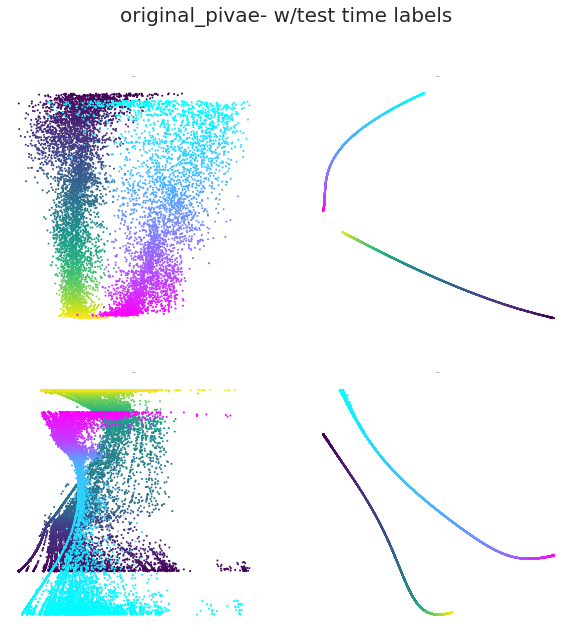

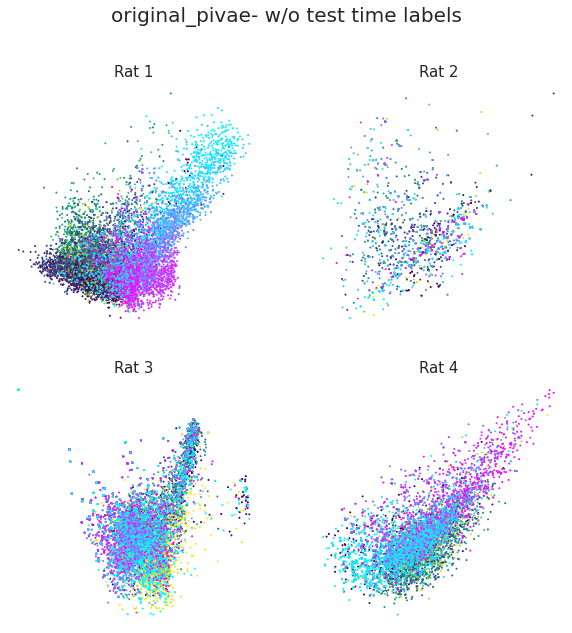

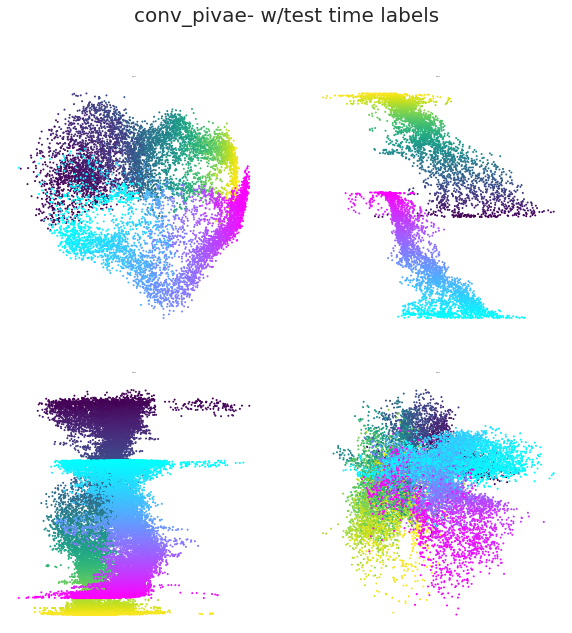

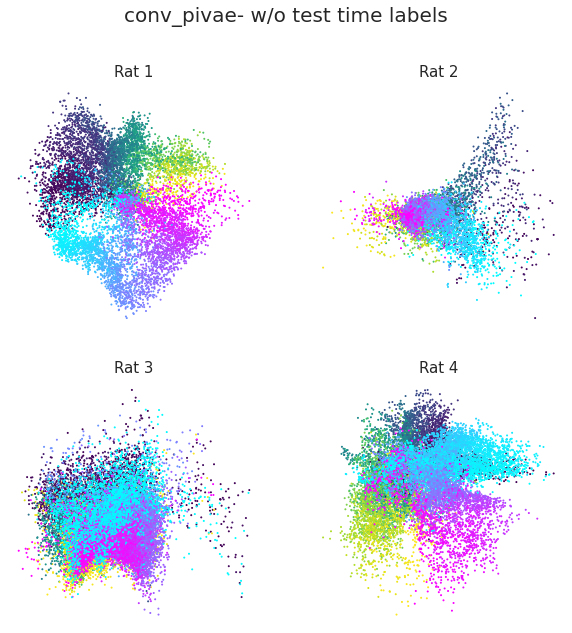

In [3]:
for model in ['original_pivae', 'conv_pivae']:
    embs = data[model]
    
    sns.set_style('white')
    fig = plt.figure(figsize=(10,10))
    plt.title(f'{model}- w/test time labels', fontsize=20, y=1.1 )
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.axis('off')
    ind1,ind2 = 0,1

    for i in range(4):
        ax=fig.add_subplot(2,2,i+1)
        ax.set_title(f'Rat {i+1}', fontsize=1.5)
        plt.axis('off')
        emb=embs['w_label']['embedding'][i]
        label=embs['w_label']['label'][i]
        r_ind = label[:,1] == 1
        l_ind = label[:,2] == 1
        r=ax.scatter(emb[r_ind,ind1], emb[r_ind,ind2], s = 1, c=label[r_ind,0],cmap = 'viridis')
        l=ax.scatter(emb[l_ind,ind1], emb[l_ind,ind2], s = 1, c=label[l_ind,0],cmap='cool')
    
    fig = plt.figure(figsize=(10,10))
    plt.title(f'{model}- w/o test time labels', fontsize=20, y=1.1)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.axis('off')
    for i in range(4):
        ax=fig.add_subplot(2,2,i+1)
        ax.set_title(f'Rat {i+1}', fontsize=15)
        plt.axis('off')
        emb=embs['wo_label']['embedding'][i]
        label=embs['wo_label']['label'][i]
        r_ind = label[:,1] == 1
        l_ind = label[:,2] == 1
        r=ax.scatter(emb[r_ind,ind1], emb[r_ind,ind2], s = 1, c=label[r_ind,0],cmap = 'viridis')
        l=ax.scatter(emb[l_ind,ind1], emb[l_ind,ind2], s = 1, c=label[l_ind,0],cmap='cool')

Text(0.5, 50.5, 'R2')

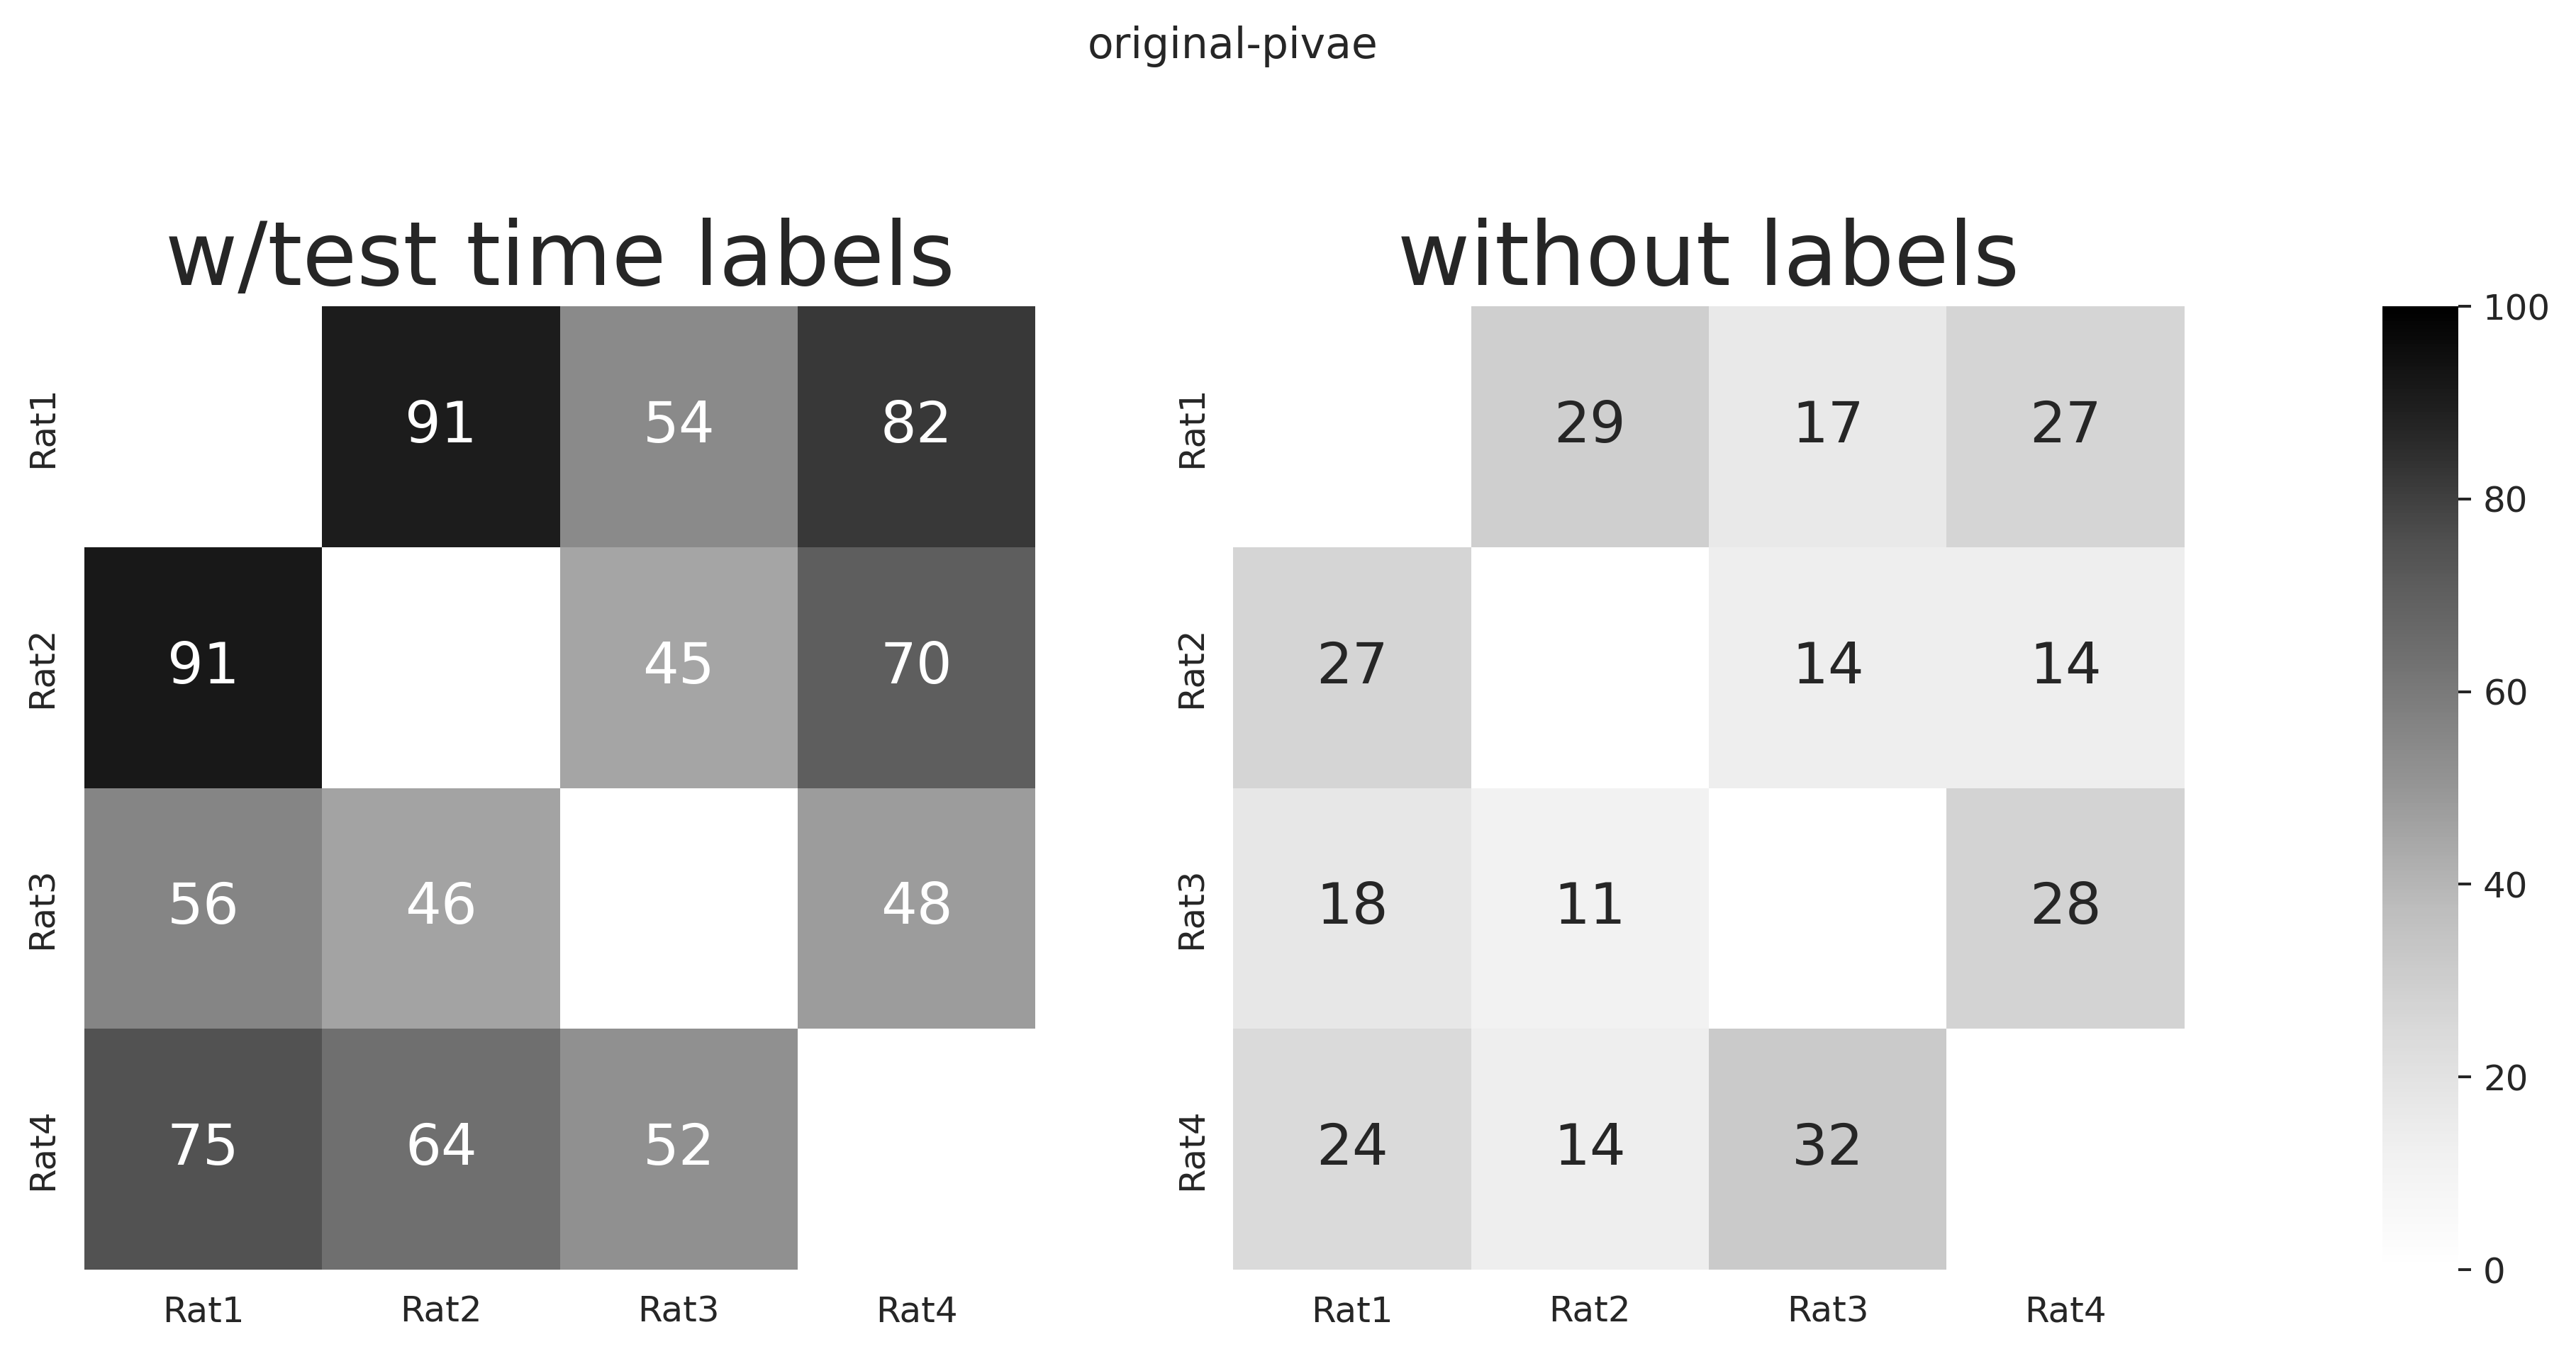

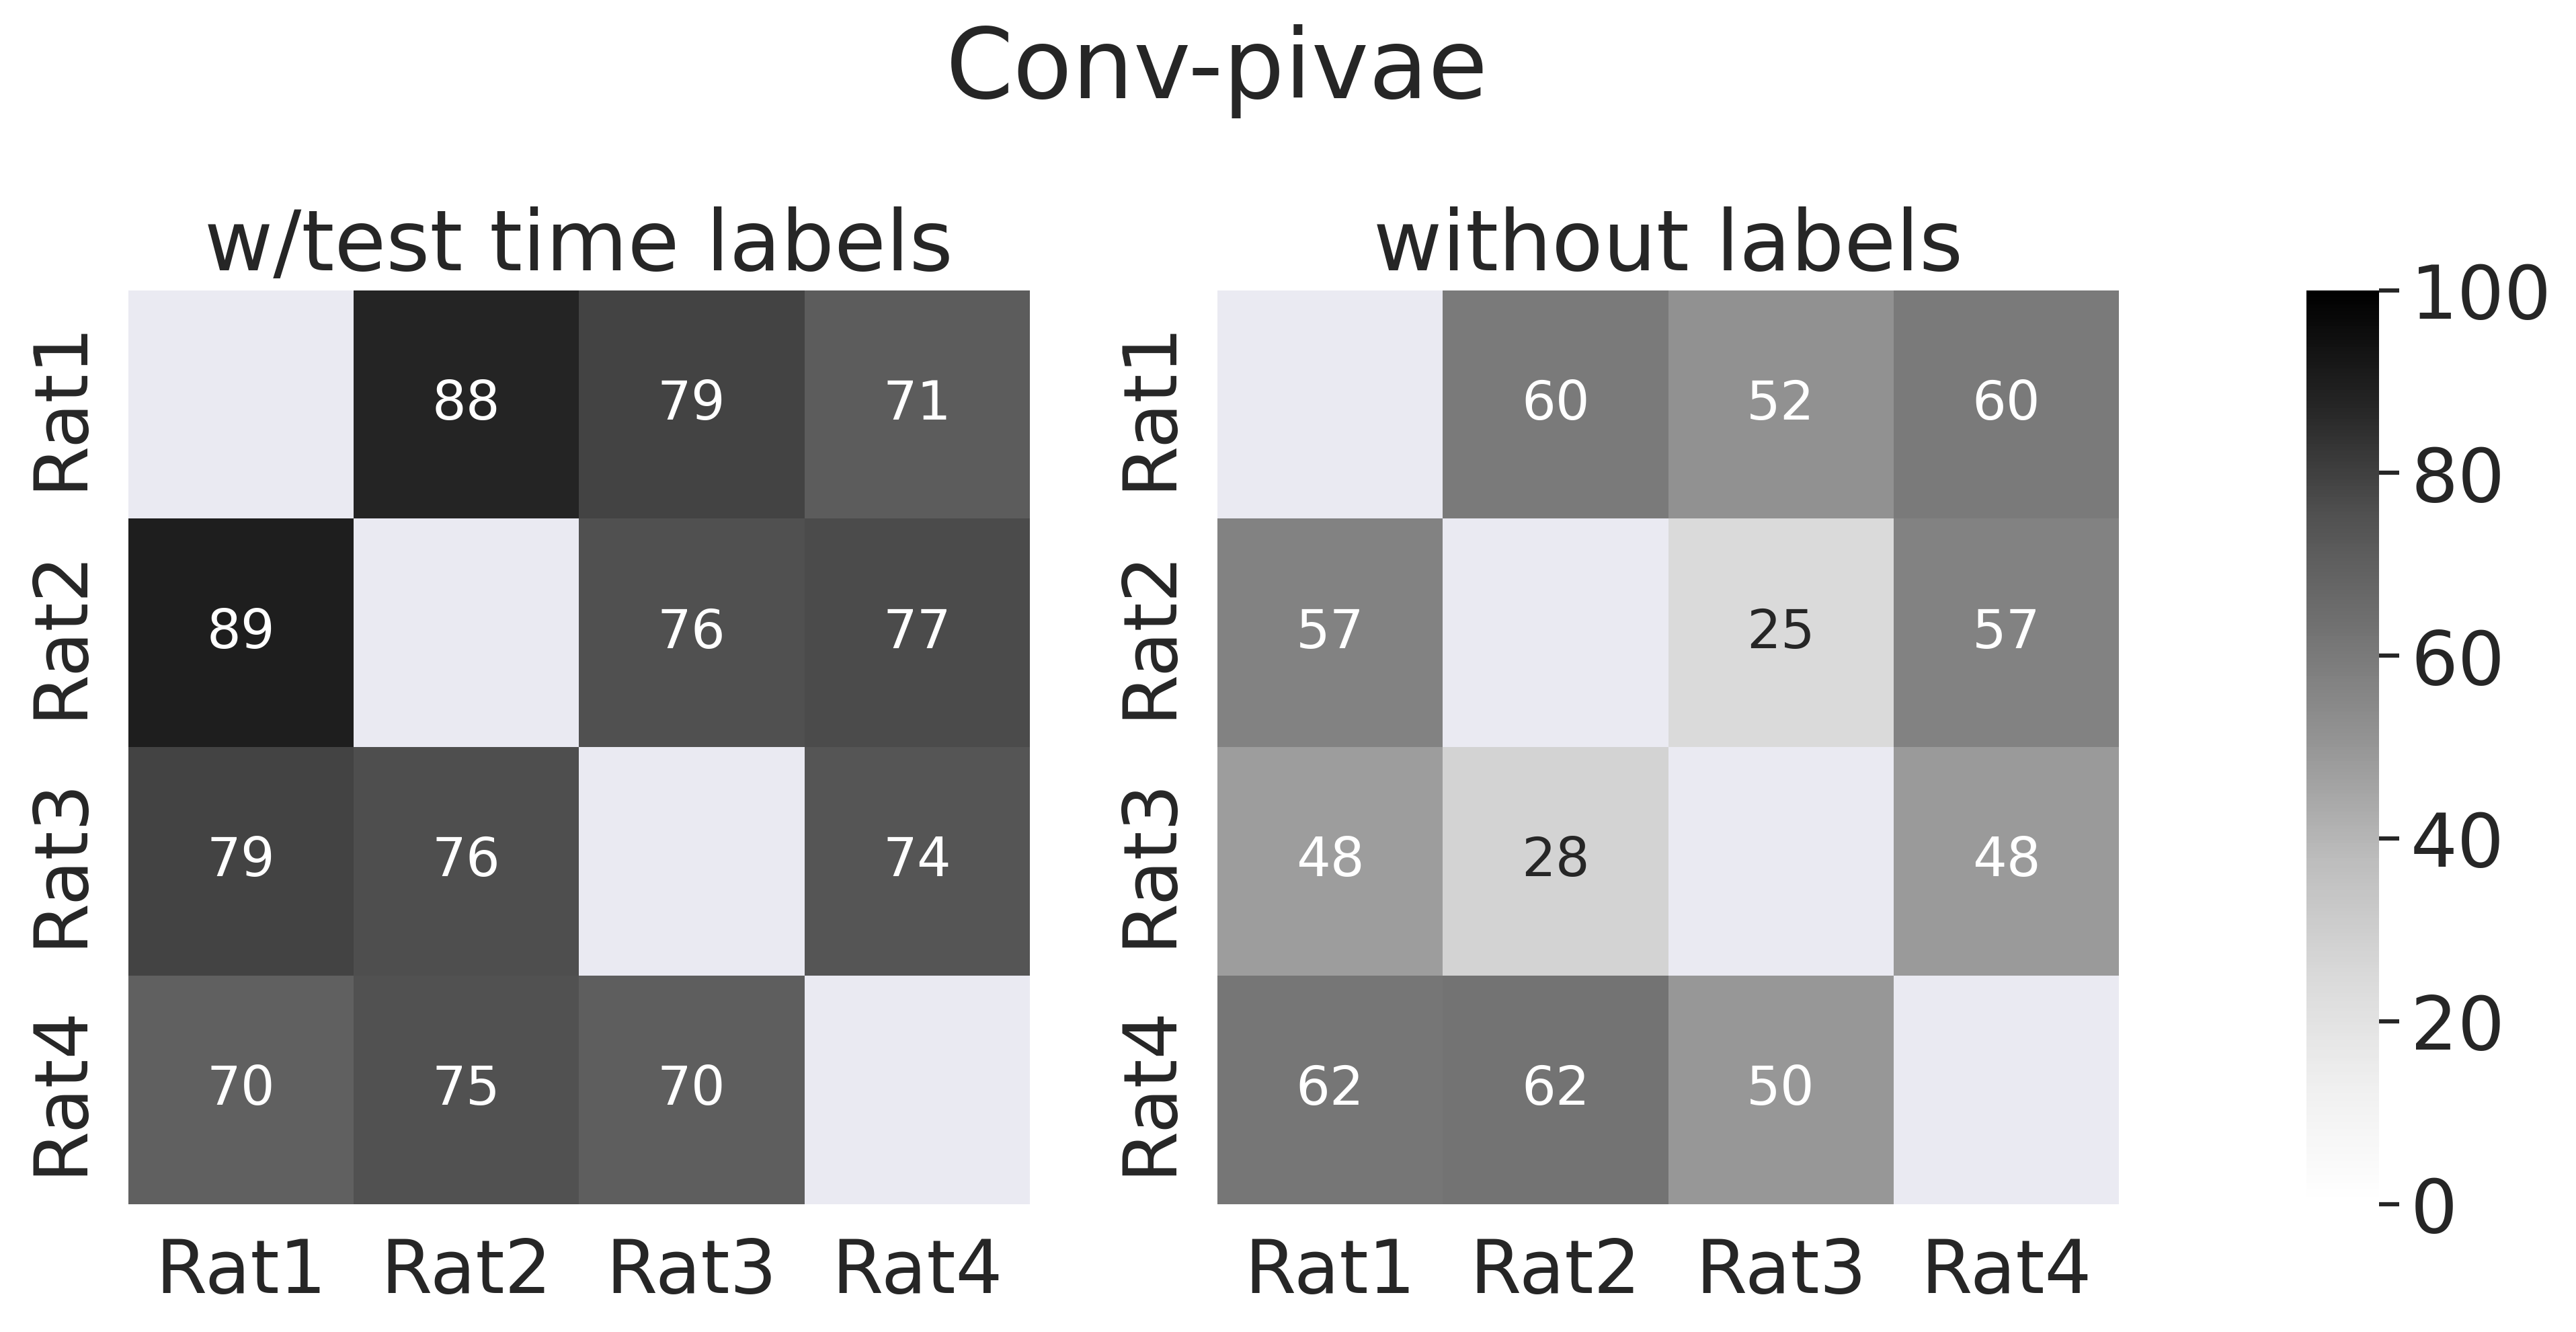

In [4]:
methods_name = ['w/test time labels', 'without labels']
def prepare_heatmap(scores, n_item):
    scores=scores.reshape(n_item,n_item-1)
    return np.array([ np.insert(scores[i], i, None) for i in range(n_item)])


fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,5),  gridspec_kw={'width_ratios':[1,1,0.08]}, dpi = 360)
fig.suptitle('original-pivae', y=1.1)
subjects = ['Rat1', 'Rat2', 'Rat3', 'Rat4']
scores = [data['original_pivae']['w_label']['consistency'], data['original_pivae']['wo_label']['consistency'] ]

sns.set(font_scale=2.0)

for i, method in enumerate(methods_name):
    score = prepare_heatmap(np.array(scores[i]), 4)
    if i == 0:
        hmap=sns.heatmap(ax = axs[i], data = score, vmin = 0.0, vmax = 100, cmap = sns.color_palette('Greys', as_cmap = True), annot = True, xticklabels = subjects, annot_kws={"fontsize":16}, yticklabels = subjects, cbar = False)
    elif i ==1:
        hmap=sns.heatmap(ax = axs[i], data = score, vmin = 0.0, vmax = 100, cmap = sns.color_palette('Greys', as_cmap = True), annot = True, xticklabels = subjects, annot_kws={"fontsize":16}, yticklabels = subjects, cbar_ax=axs[2])
    hmap.set_title(method, fontsize=25)
    
        
plt.subplots_adjust(wspace=0.3)
axs[-1].set_xlabel('R2')

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12,5),  gridspec_kw={'width_ratios':[1,1,0.08]}, dpi = 360)
fig.suptitle('Conv-pivae', y=1.1)
subjects = ['Rat1', 'Rat2', 'Rat3', 'Rat4']
scores = [data['conv_pivae']['w_label']['consistency'], data['conv_pivae']['wo_label']['consistency'] ]

sns.set(font_scale=2.0)

for i, method in enumerate(methods_name):
    score = prepare_heatmap(np.array(scores[i]), 4)
    if i == 0:
        hmap=sns.heatmap(ax = axs[i], data = score, vmin = 0.0, vmax = 100, cmap = sns.color_palette('Greys', as_cmap = True), annot = True, xticklabels = subjects, annot_kws={"fontsize":16}, yticklabels = subjects, cbar = False)
    elif i ==1:
        hmap=sns.heatmap(ax = axs[i], data = score, vmin = 0.0, vmax = 100, cmap = sns.color_palette('Greys', as_cmap = True), annot = True, xticklabels = subjects, annot_kws={"fontsize":16}, yticklabels = subjects, cbar_ax=axs[2])
    hmap.set_title(method, fontsize=25)
    
        
plt.subplots_adjust(wspace=0.3)
axs[-1].set_xlabel('R2')


